In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def plot_agent_utility(mean_per_run):
    plt.figure(figsize=(10, 6))
    agents = mean_per_run['Agent'].unique()
    for agent in agents:
        agent_data = mean_per_run[mean_per_run['Agent'] == agent]
        plt.plot(agent_data['Run'], agent_data['Net Utility'], label=agent)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.legend(title='Agent')
    plt.xlabel('Run')
    plt.ylabel('Net Utility')
    plt.title('Net Utility per Run by Agent')
    plt.show()

In [71]:
def read_run_data(dir):
    dataframes = []
    for file_run in os.listdir(dir):
        if file_run.startswith('run'):
            df = pd.read_csv(os.path.join(dir, file_run))
            if not df.empty:
                dataframes.append(df)
    agent_data = pd.concat(dataframes, ignore_index=True)
    return agent_data

In [4]:
def plot_live_run_data(dir):
    agent_data = read_run_data(dir)
    mean_per_run = agent_data \
        .groupby(by=['Agent', 'Run']) \
        .mean() \
        .reset_index() \
        .drop(columns='Iteration')
    plot_agent_utility(mean_per_run)

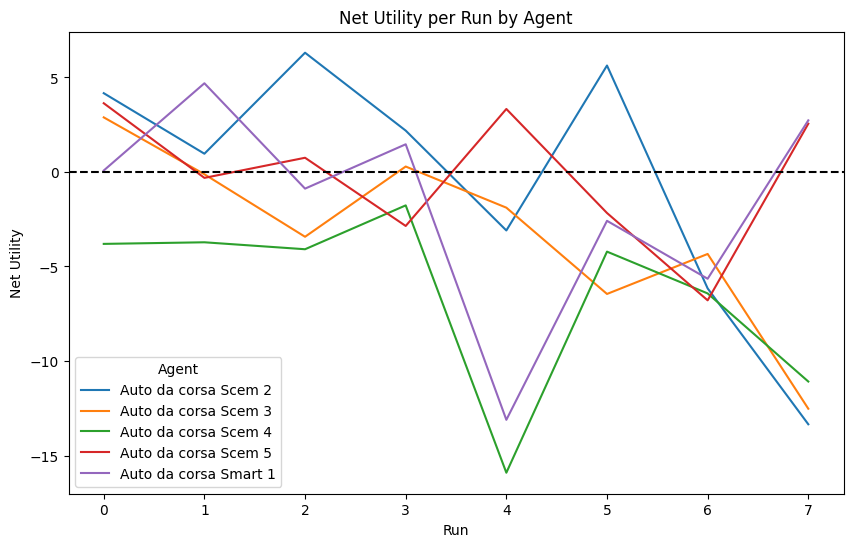

In [84]:
plot_live_run_data('../results/FP_Oracle_auto_DR_others_auto_Truth_100_experiments/')

In [80]:
agent_name = 'Auto da corsa Smart 1'

In [78]:
def plot_mean_utility_agent(path, agent):
    agent_data = read_run_data(path)
    mean_per_run = agent_data \
        .groupby(by=['Agent', 'Run']) \
        .mean() \
        .reset_index() \
        .drop(columns='Iteration')
    agent_data_mean = mean_per_run[mean_per_run['Agent'] == agent]
    plt.figure(figsize=(10, 6))
    plt.plot(agent_data_mean['Run'], agent_data_mean['Net Utility'])
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Run')
    plt.ylabel('Net Utility')
    plt.title('Net Utility per Run for Agent ' + agent)
    plt.show()

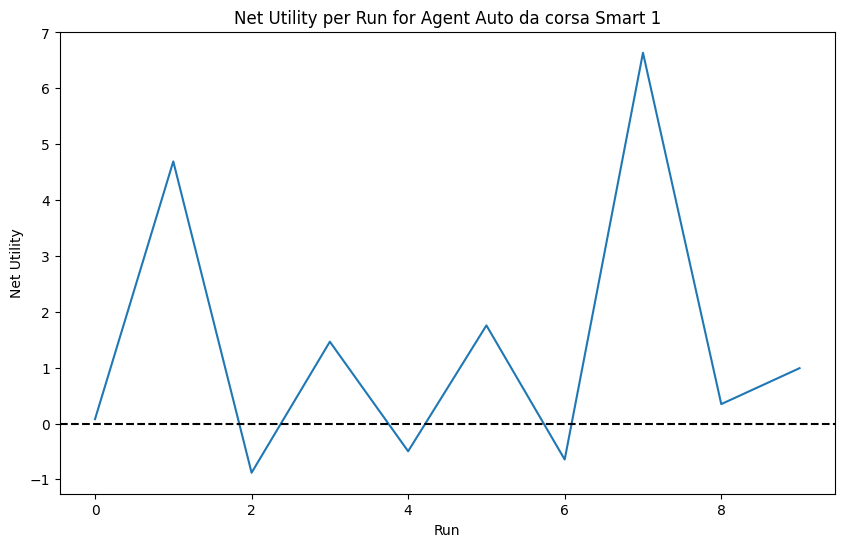

In [95]:
plot_mean_utility_agent('../results/FP_Oracle_auto_DR_others_auto_Truth_100_experiments/', agent_name)

In [49]:
def plot_live_single_run_data(dir, run):
    agent_data = read_run_data(dir)
    agents = agent_data['Agent'].unique()
    run_data = agent_data[agent_data['Run'] == run]
    plt.figure(figsize=(10, 6))
    for agent in agents:
        agent_data = run_data[run_data['Agent'] == agent]
        plt.plot(agent_data['Iteration'], agent_data['Net Utility'], label=agent)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.legend(title='Agent')
    plt.xlabel('Iteration')
    plt.ylabel('Net Utility')
    plt.title('Net Utility per Iteration by Agent for Run ' + str(run))
    plt.show()

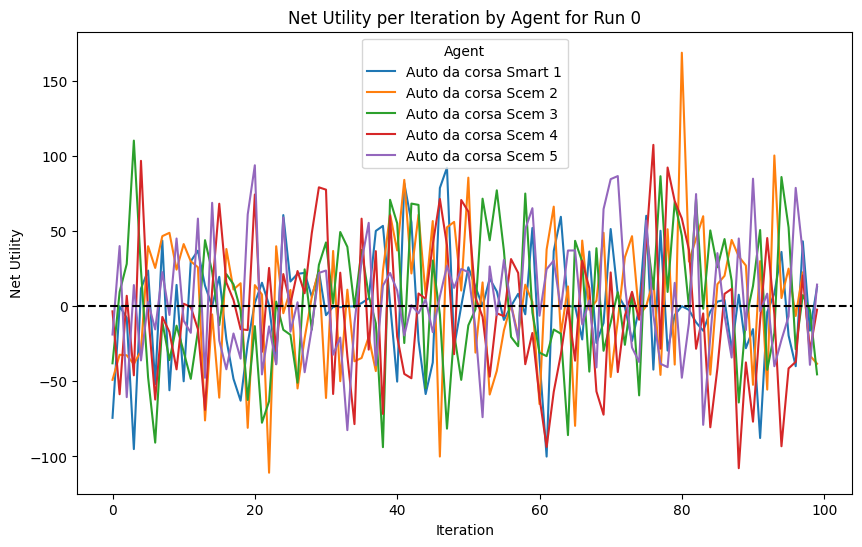

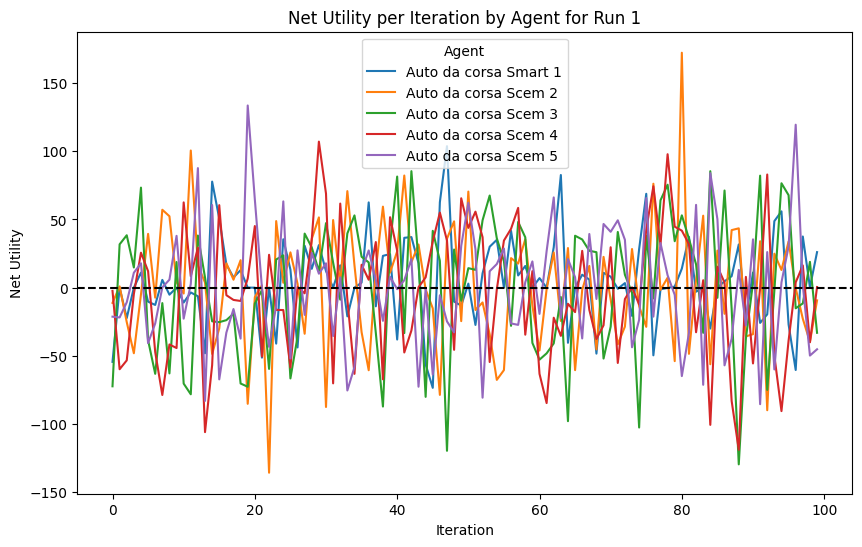

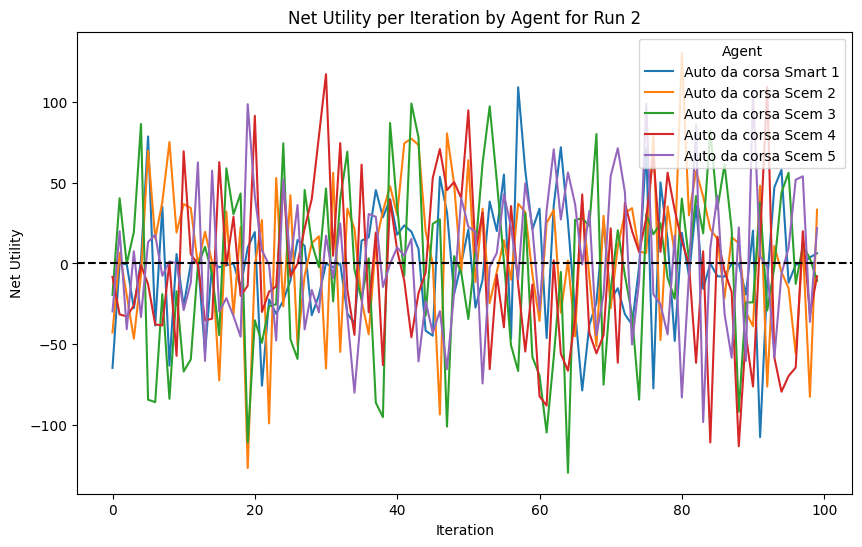

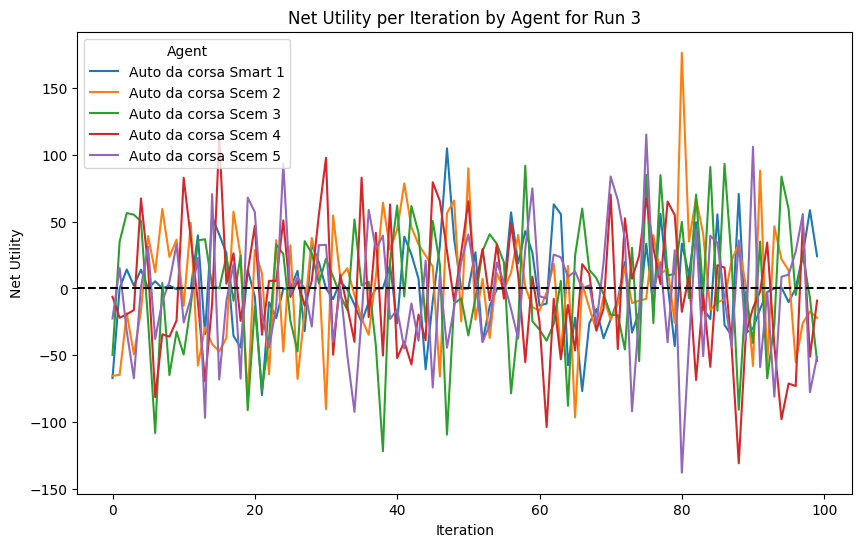

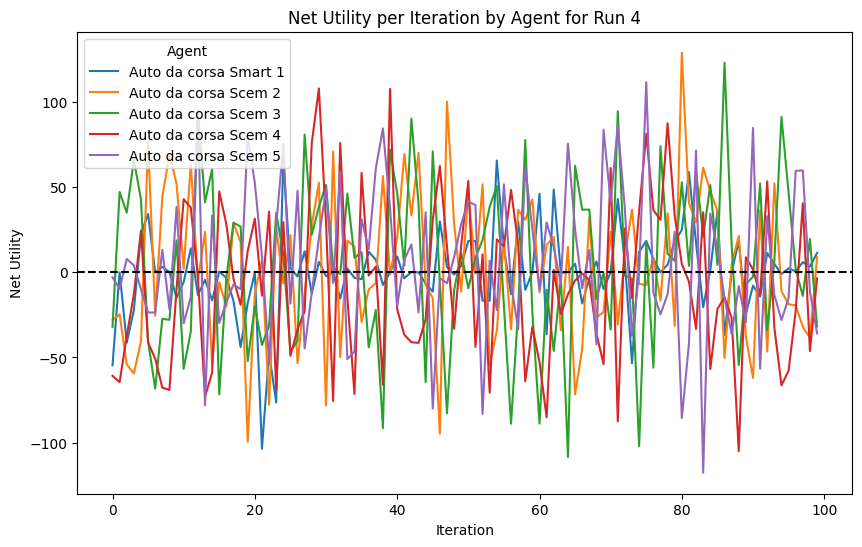

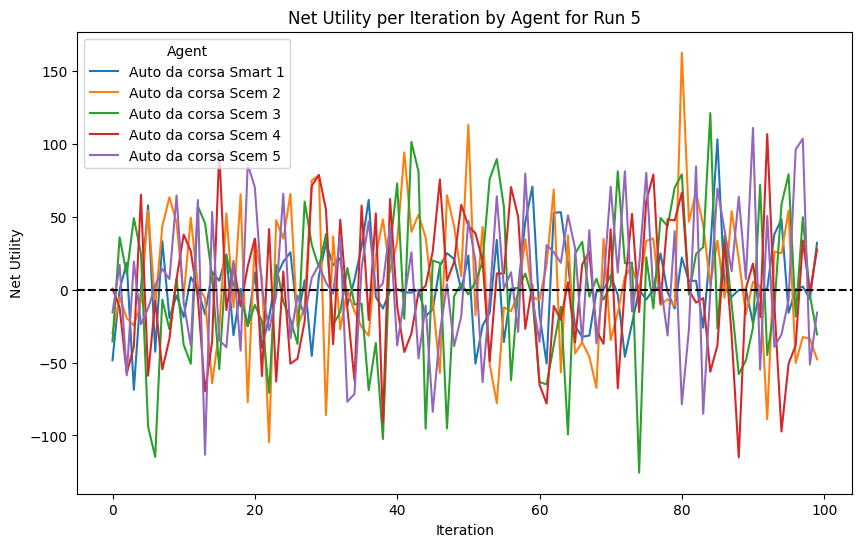

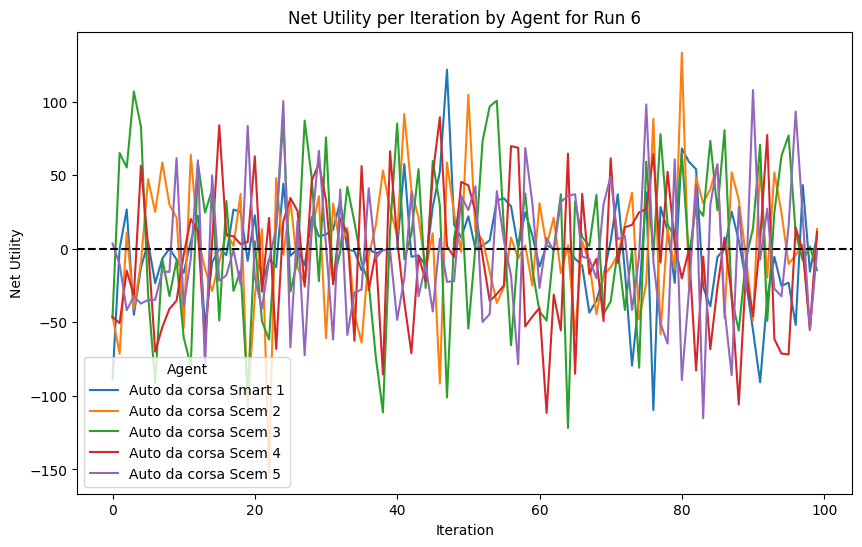

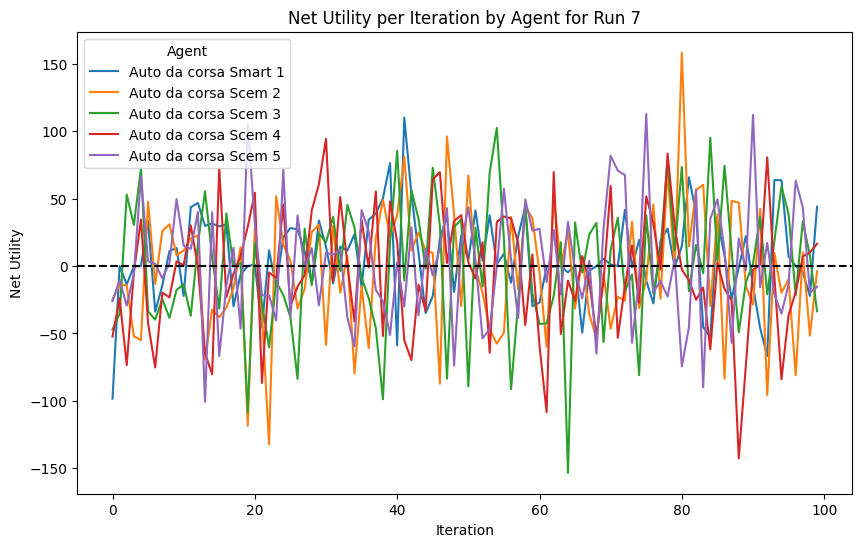

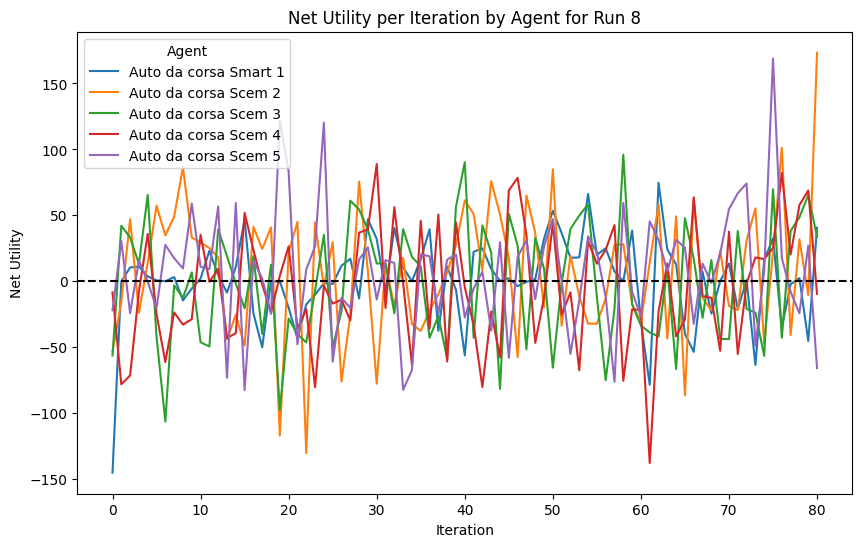

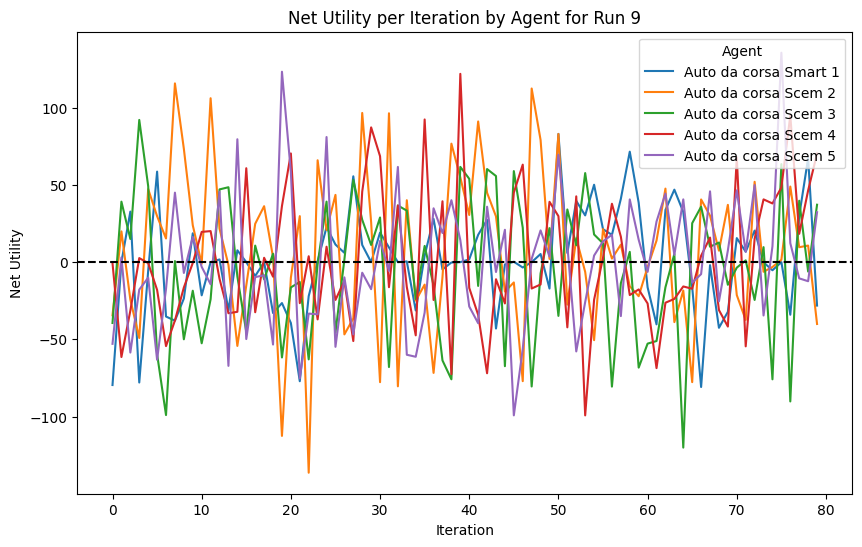

In [93]:
for i in range(10):
    plot_live_single_run_data('../results/FP_Oracle_auto_DR_others_auto_Truth_100_experiments/', i)

In [55]:
def plot_run_agent(dir, run, agent):
    agent_data = read_run_data(dir)
    run_data = agent_data[(agent_data['Run'] == run) & (agent_data['Agent'] == agent)]
    plt.figure(figsize=(10, 6))
    plt.plot(run_data['Iteration'], run_data['Net Utility'])
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('Net Utility')
    plt.title('Net Utility per Iteration for Agent ' + agent + ' in Run ' + str(run))
    plt.show()

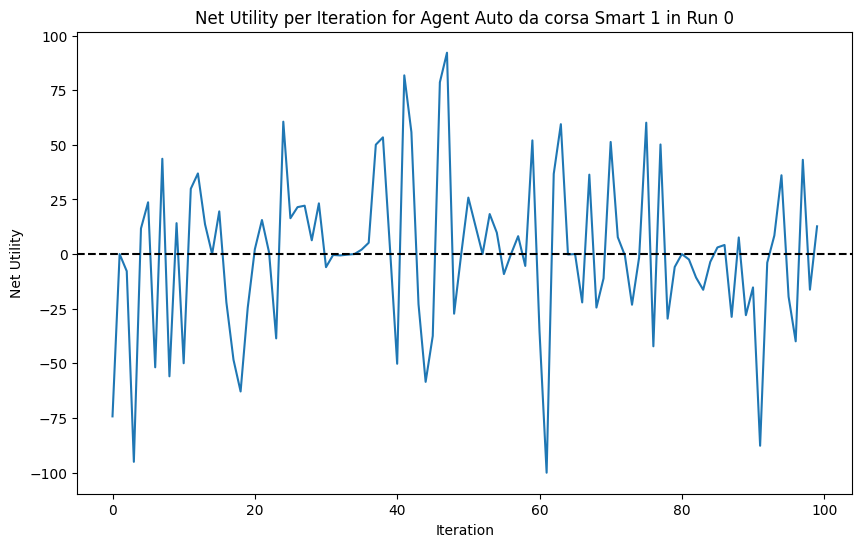

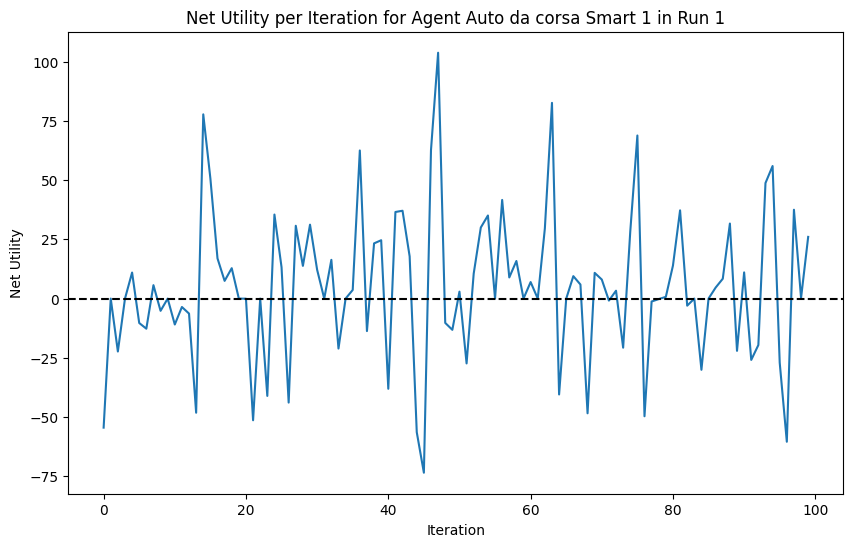

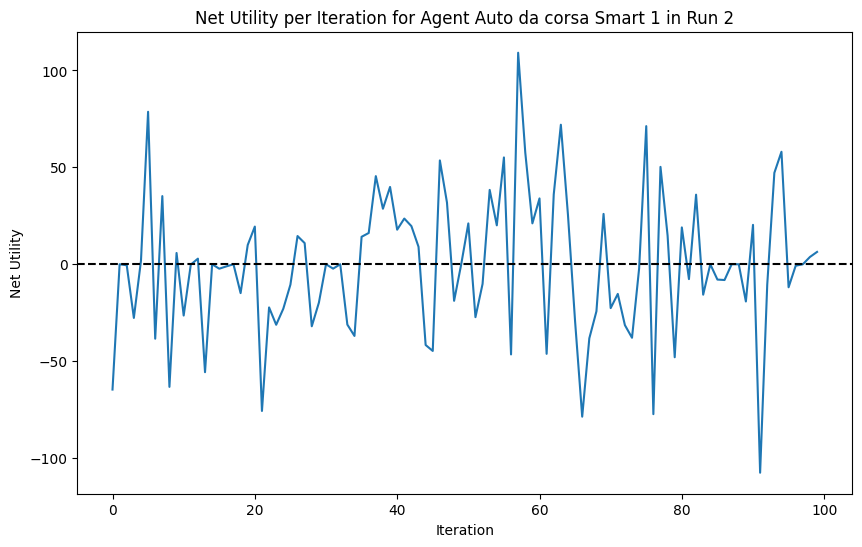

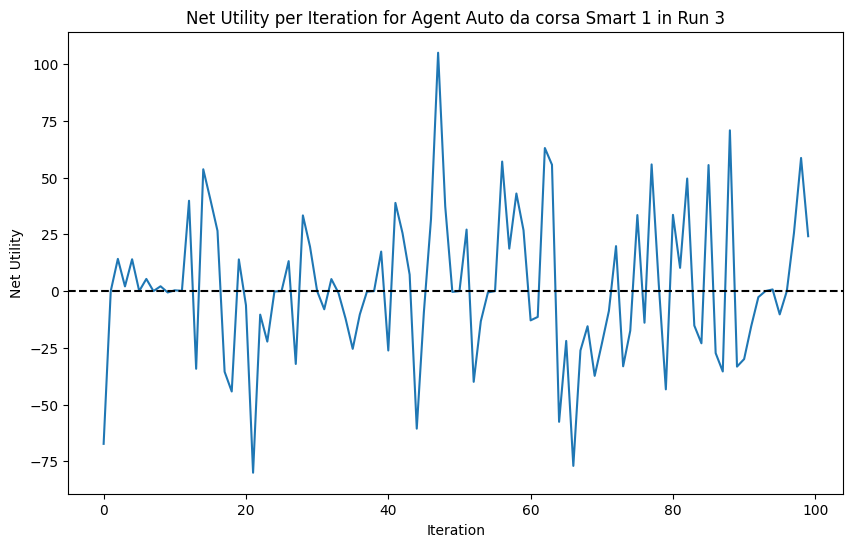

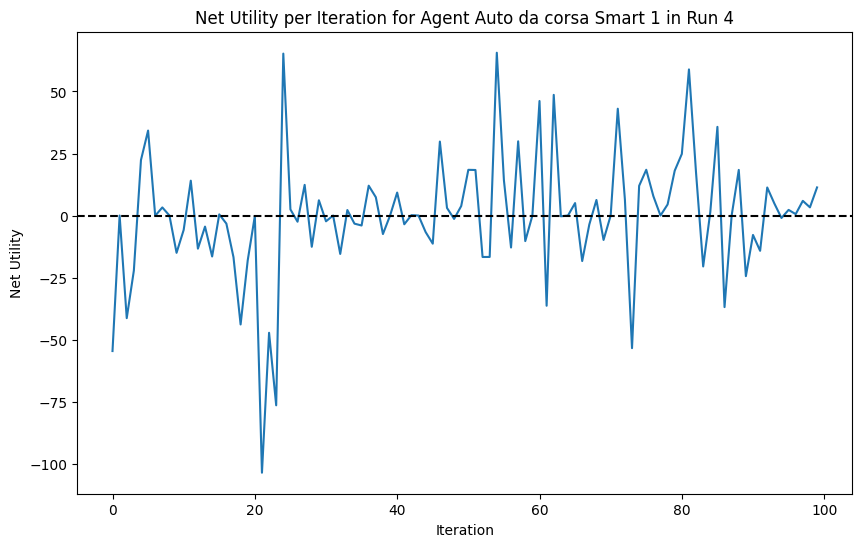

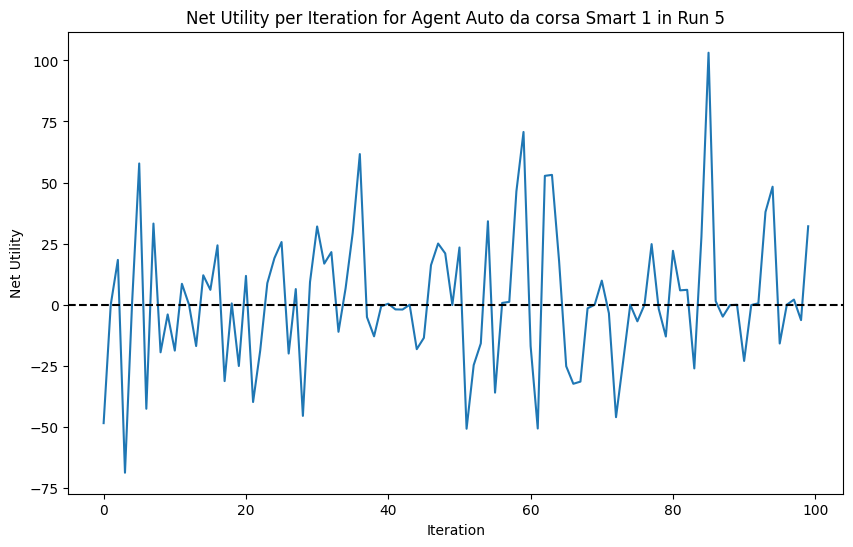

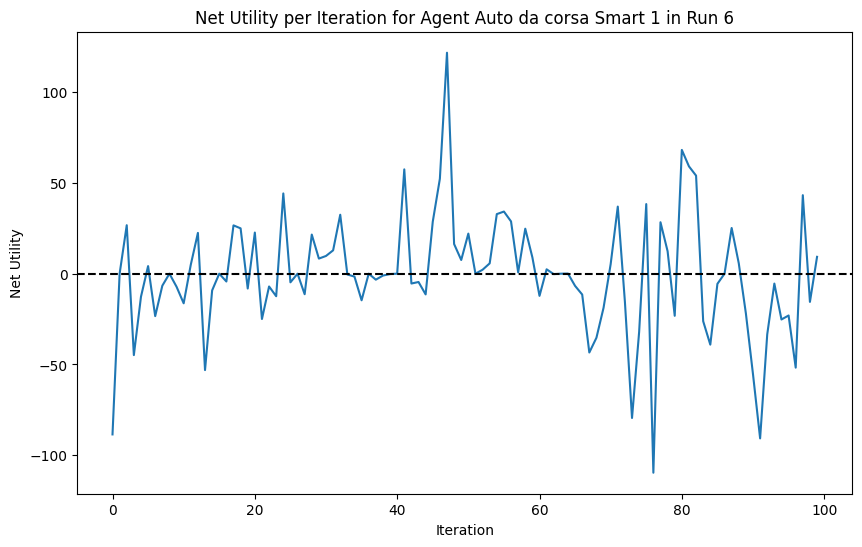

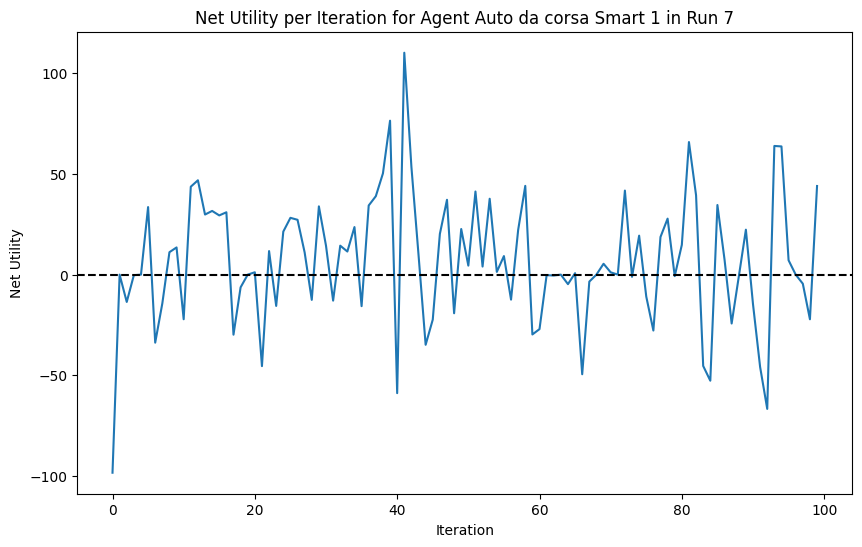

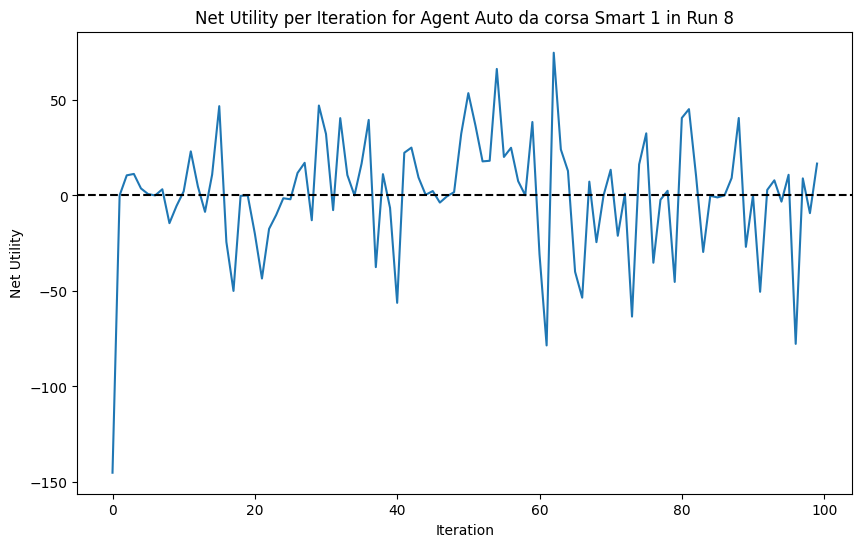

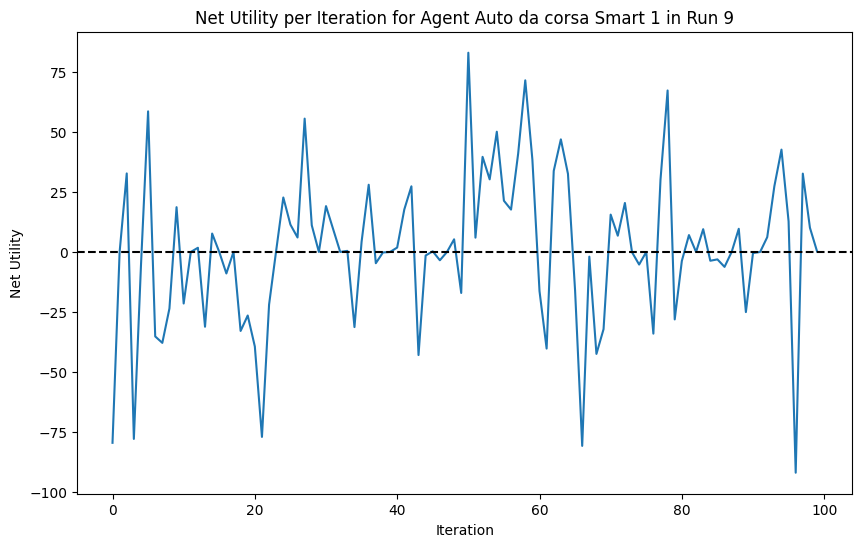

In [96]:
for i in range(10):
    plot_run_agent('../results/FP_Oracle_auto_DR_others_auto_Truth_100_experiments/', i, agent_name)